<a href="https://colab.research.google.com/github/Sienna0429/Week3-Machine_Learning/blob/main/A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing the required libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa.display
import soundfile
import os
# matplotlib complains about the behaviour of librosa.display, so we'll ignore those warnings:
import warnings; warnings.filterwarnings('ignore')

In [ ]:
def feature_chromagram(waveform, sample_rate):
    # STFT computed here explicitly; mel spectrogram and MFCC functions do this under the hood
    stft_spectrogram=np.abs(librosa.stft(waveform))
    # Produce the chromagram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    chromagram=np.mean(librosa.feature.chroma_stft(S=stft_spectrogram, sr=sample_rate).T,axis=0)
    return chromagram

def feature_melspectrogram(waveform, sample_rate):
    # Produce the mel spectrogram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    # Using 8khz as upper frequency bound should be enough for most speech classification tasks
    melspectrogram=np.mean(librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=128, fmax=8000).T,axis=0)
    return melspectrogram

def feature_mfcc(waveform, sample_rate):
    # Compute the MFCCs for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    # 40 filterbanks = 40 coefficients
    mfc_coefficients=np.mean(librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=40).T, axis=0)
    return mfc_coefficients

In [ ]:
def get_features(file):
    # load an individual soundfile
     with soundfile.SoundFile(file) as audio:
        waveform = audio.read(dtype="float32")
        sample_rate = audio.samplerate
        # compute features of soundfile
        chromagram = feature_chromagram(waveform, sample_rate)
        melspectrogram = feature_melspectrogram(waveform, sample_rate)
        mfc_coefficients = feature_mfcc(waveform, sample_rate)

        feature_matrix=np.array([])
        # use np.hstack to stack our feature arrays horizontally to create a feature matrix
        feature_matrix = np.hstack((chromagram, melspectrogram, mfc_coefficients))

        return feature_matrix

In [ ]:
#Emotions in the merged RAVDESS and EmoDB dataset
emotionR={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'

}

In [ ]:
emotionsE ={
  'W':'angry',
  'F':'happy',
  'T':'sad',
  'E':'disgust',
  'N':'neutral',
  'A':'fearful',
  "L": "boredom"
}

In [ ]:
#emotions in E
import os, glob

def load_data():
    X,y=[],[]
    count = 0
    for file in glob.glob("/content/drive/MyDrive/EMODB_1/wav/Actor_*/*.wav"):
        file_name=os.path.basename(file)

        emotion=emotionsE[(file_name[5])]
        #print(emotion)
        featuresE = get_features(file)

        X.append(featuresE)
        y.append(emotion)
        count += 1
        #changing it to 535 because EmoDB has 535 audio samples
        print('\r' + f' Processed {count}/{535} audio samples',end=' ')
    return np.array(X), np.array(y)

In [ ]:
featuresE, emotionsE = load_data()

 Processed 535/535 audio samples 

In [ ]:
#emotion in R
import os, glob

#there are 1440 voice samples in RAVDESS
def load_dataR():
    X,y=[],[]
    count = 0
    for file in glob.glob("/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        #print(file_name)

        emotion=emotionR[(file_name.split("-")[2])]
        #print(emotion)
        featuresR = get_features(file)

        X.append(featuresR)
        y.append(emotion)
        count += 1
        #changing it to 535 because ravdess has 1440 vaudio samples
        print('\r' + f' Processed {count}/{1440} audio samples',end=' ')
    return np.array(X), np.array(y)

In [ ]:
featuresR, emotionR = load_dataR()

 Processed 1435/1440 audio samples 

In [ ]:
emotionsberlin = np.delete(emotionsE, emotionsE == 'boredom')
emotions1 = np.delete(emotionR, emotionR == 'calm')
emotionsr = np.delete(emotions1, emotions1 == 'surprised')

In [ ]:
emotionsall = np.concatenate((emotionsr, emotionsberlin))

In [ ]:
features_berlin = np.delete(featuresE, np.where(emotionsE == 'boredom'), axis=0)
features_r = np.delete(featuresR, np.where(emotionR == 'calm'), axis=0)
features_r = np.delete(features_r, np.where(emotions1 == 'surprised'), axis=0)


In [ ]:
features_all = np.concatenate((features_r, features_berlin))
assert len(features_all) == len(emotionsall)

**Merged "emotionall" end**

In [ ]:
print(f'\nAudio samples represented: {features_all.shape[0]}')
print(f'Numerical features extracted per sample: {features_all.shape[1]}')
features_df = pd.DataFrame(features_all) # make it pretty for display

#making dataframe for emotions as well
emotions_df = pd.DataFrame(emotionsall) # make it pretty for display

features_df



Audio samples represented: 1508
Numerical features extracted per sample: 180


,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0.746713,0.749838,0.768450,0.793541,0.813859,0.818332,0.770810,0.733808,0.730885,0.744682,...,-0.660434,0.362222,-2.200885,0.387327,-1.173349,-0.706832,-0.567279,-0.110122,-1.495733,0.177251
1,0.637808,0.682767,0.687663,0.689618,0.708528,0.700145,0.682552,0.722104,0.709216,0.626154,...,-2.634426,-1.700531,-3.991694,-0.316717,-1.556687,-0.427108,1.097938,1.961555,3.310557,3.859228
2,0.697129,0.645323,0.658073,0.718832,0.760633,0.767993,0.735645,0.704933,0.712891,0.724874,...,-0.736685,1.115799,-0.630632,2.316130,3.247453,2.942178,3.038957,4.121116,5.192869,4.463716
3,0.752797,0.745870,0.756483,0.773596,0.783947,0.786047,0.782934,0.758735,0.786581,0.797025,...,-0.522414,0.143098,-1.179832,0.645743,-0.191850,-0.206166,0.100729,0.254184,-0.176777,-0.278134
4,0.707388,0.735285,0.752196,0.774876,0.802778,0.812672,0.777501,0.775629,0.814736,0.818179,...,0.178199,0.005108,-0.866433,1.212418,-0.638431,0.479869,0.397081,1.196098,0.115429,0.511123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,0.507520,0.499368,0.532428,0.506579,0.528680,0.539010,0.504441,0.505100,0.469307,0.428356,...,-0.991870,0.007045,0.752729,0.051908,-2.058114,2.026254,2.736570,1.433041,-2.871745,-0.514557
1504,0.700776,0.675740,0.612868,0.582986,0.622597,0.634416,0.613263,0.609651,0.599084,0.584408,...,0.472891,1.176518,-0.487388,2.135675,-0.502816,-0.849769,-0.639402,0.521889,-1.205957,-1.098366
1505,0.659702,0.660300,0.631351,0.608467,0.605072,0.629187,0.604877,0.587283,0.573607,0.556409,...,1.039064,1.733421,1.528745,1.866979,0.572246,0.293463,0.556083,1.131510,-0.649698,1.663676
1506,0.502260,0.573440,0.604666,0.534638,0.441503,0.400520,0.446422,0.471181,0.475470,0.525732,...,2.325842,3.944738,1.094528,-0.357369,-1.029926,-0.662872,-3.076123,1.277314,-1.446331,1.259088


In [ ]:
features_df.to_excel('/content/drive/MyDrive/featuresRavdess.xlsx')
emotions_df.to_excel('/content/drive/MyDrive/emotionsRavdess.xlsx')

In [ ]:
features_all = pd.read_excel('/content/drive/MyDrive/featuresRavdess.xlsx', index_col=0)
emotionsall = pd.read_excel('/content/drive/MyDrive/emotionsRavdess.xlsx', index_col=0)

In [ ]:
features_all.head()

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0.746713,0.749838,0.768450,0.793541,0.813859,0.818332,0.770810,0.733808,0.730885,0.744682,...,-0.660434,0.362222,-2.200885,0.387327,-1.173349,-0.706832,-0.567279,-0.110122,-1.495733,0.177251
1,0.637808,0.682767,0.687663,0.689618,0.708528,0.700145,0.682552,0.722104,0.709216,0.626154,...,-2.634426,-1.700531,-3.991694,-0.316717,-1.556687,-0.427108,1.097938,1.961555,3.310557,3.859228
2,0.697129,0.645323,0.658073,0.718832,0.760633,0.767993,0.735645,0.704933,0.712891,0.724874,...,-0.736685,1.115799,-0.630632,2.316130,3.247453,2.942178,3.038957,4.121116,5.192869,4.463716
3,0.752797,0.745870,0.756483,0.773596,0.783947,0.786047,0.782934,0.758735,0.786581,0.797025,...,-0.522414,0.143098,-1.179832,0.645743,-0.191850,-0.206166,0.100729,0.254184,-0.176777,-0.278134
4,0.707388,0.735285,0.752196,0.774876,0.802778,0.812672,0.777501,0.775629,0.814736,0.818179,...,0.178199,0.005108,-0.866433,1.212418,-0.638431,0.479869,0.397081,1.196098,0.115429,0.511123


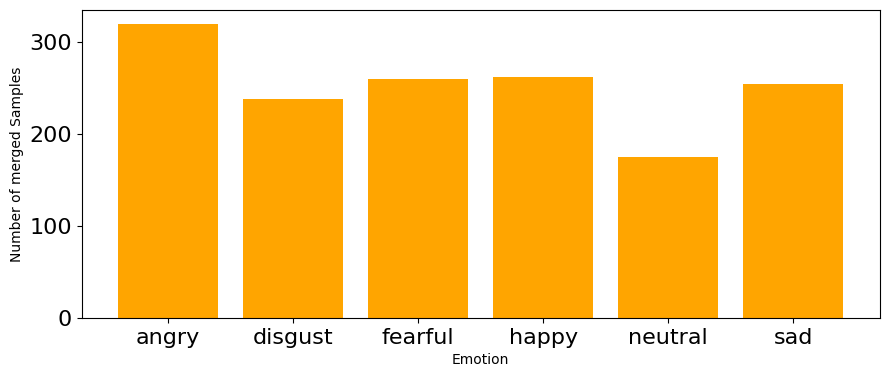

In [ ]:
plt.figure(figsize=(35,4))
plt.subplot(1,3,2)
emotion_list, count = np.unique(emotionsall, return_counts=True)
plt.bar(x=range(6), height=count, color = "orange")
plt.xticks(ticks=range(6), labels = [emotion for emotion in emotion_list],fontsize=10)
plt.xlabel('Emotion')
plt.tick_params(labelsize=16)
plt.ylabel('Number of merged Samples')
plt.show()

Feature scaling

In [ ]:
# We would usually use df.describe(), but it provides a bit of a mess of information we don't need at the moment.
def print_features(df):
    # Check chromagram feature values
    features_df_chromagram = df.loc[:,:11]
    chroma_min = features_df_chromagram.min().min()
    chroma_max = features_df_chromagram.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    chroma_mean = features_df_chromagram.stack().mean()
    chroma_stdev = features_df_chromagram.stack().std()
    print(f'12 Chromagram features:       \
    min = {chroma_min:.3f}, \
    max = {chroma_max:.3f}, \
    mean = {chroma_mean:.3f}, \
    deviation = {chroma_stdev:.3f}')

    # Check mel spectrogram feature values
    features_df_melspectrogram = df.loc[:,12:139]
    mel_min = features_df_melspectrogram.min().min()
    mel_max = features_df_melspectrogram.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    mel_mean = features_df_melspectrogram.stack().mean()
    mel_stdev = features_df_melspectrogram.stack().std()
    print(f'\n128 Mel Spectrogram features: \
    min = {mel_min:.3f}, \
    max = {mel_max:.3f}, \
    mean = {mel_mean:.3f}, \
    deviation = {mel_stdev:.3f}')

    # Check MFCC feature values
    features_df_mfcc = df.loc[:,140:179]
    mfcc_min = features_df_mfcc.min().min()
    mfcc_max = features_df_mfcc.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    mfcc_mean = features_df_mfcc.stack().mean()
    mfcc_stdev = features_df_mfcc.stack().std()
    print(f'\n40 MFCC features:             \
    min = {mfcc_min:.3f},\
    max = {mfcc_max:.3f},\
    mean = {mfcc_mean:.3f},\
    deviation = {mfcc_stdev:.3f}')

print_features(features_df)

12 Chromagram features:           min = 0.276,     max = 0.888,     mean = 0.640,     deviation = 0.093

128 Mel Spectrogram features:     min = 0.000,     max = 886.647,     mean = 1.328,     deviation = 9.748

40 MFCC features:                 min = -863.639,    max = 121.174,    mean = -11.163,    deviation = 82.575


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
# keep our unscaled features just in case we need to process them alternatively
features_scaled = features_all
features_scaled = scaler.fit_transform(features_scaled)

scaler = MinMaxScaler()
# keep our unscaled features just in case we need to process them alternatively
features_minmax = features_all
features_minmax = scaler.fit_transform(features_minmax)

In [ ]:
print('\033[1m'+'Standard Scaling:\n'+'\033[0m')
features_scaled_df = pd.DataFrame(features_scaled)
print_features(features_scaled_df)

print('\n\n\033[1m'+'MinMax Scaling:\n'+'\033[0m')
features_minmax_df = pd.DataFrame(features_minmax)
print_features(features_minmax_df)

Standard Scaling:

12 Chromagram features:           min = -4.046,     max = 2.602,     mean = 0.000,     deviation = 1.000

128 Mel Spectrogram features:     min = -0.475,     max = 33.092,     mean = -0.000,     deviation = 1.000

40 MFCC features:                 min = -4.719,    max = 6.582,    mean = 0.000,    deviation = 1.000


MinMax Scaling:

12 Chromagram features:           min = 0.000,     max = 1.000,     mean = 0.599,     deviation = 0.179

128 Mel Spectrogram features:     min = 0.000,     max = 1.000,     mean = 0.024,     deviation = 0.068

40 MFCC features:                 min = 0.000,    max = 1.000,    mean = 0.393,    deviation = 0.177


**Machine Learning Models**

In [ ]:
from sklearn.model_selection import train_test_split


############# Unscaled test/train set #############
X_train, X_test, y_train, y_test =train_test_split(
    features_all,
    emotionsall,
    test_size=0.2,
    random_state=69
)

############ Standard Scaled test/train set ###########
# The labels/classes (y_train, y_test) never change, keep old values
X_train_scaled, X_test_scaled, _, _ = train_test_split(
    features_scaled,
    emotionsall,
    test_size=0.2,
    random_state=69
)

############# MinMax Scaled test/train set ###############
# The labels/classes (y_train, y_test) never change, keep old values
X_train_minmax, X_test_minmax, _, _ = train_test_split(
    features_minmax,
    emotionsall,
    test_size=0.2,
    random_state=69
)

**Comparing Models**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classification_models = [
    KNeighborsClassifier(),#(3),
    SVC(kernel='linear'),#, C=0.025),
    SVC(kernel='rbf'),
    DecisionTreeClassifier(),#max_depth=5),
    RandomForestClassifier(),#max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

scores = []
for model in classification_models:
    model.fit(X_train_scaled, y_train)
    score = model.score(X_test_scaled, y_test)
    model_name = type(model).__name__
    if model_name=='SVC' and model.kernel=='rbf': model_name+=' RBF kernel'
    scores.append((model_name,(f'{100*score:.2f}%')))
# Make it pretty
scores_df = pd.DataFrame(scores,columns=['Classifier','Accuracy Score'])
scores_df.sort_values(by='Accuracy Score',axis=0,ascending=False)

,Classifier,Accuracy Score
4,RandomForestClassifier,59.27%
0,KNeighborsClassifier,56.29%
1,SVC,53.31%
2,SVC RBF kernel,47.68%
3,DecisionTreeClassifier,42.72%
5,AdaBoostClassifier,36.09%
6,GaussianNB,36.09%
7,QuadraticDiscriminantAnalysis,34.44%


The Support Vector Machine Classifier

In [ ]:
from sklearn.svm import SVC

model = SVC(
    C=10,  #higher the value tighter the margin
    gamma='auto',
    kernel='rbf',
    random_state=69
)

model.fit(X_train, y_train)

print(f'SVC Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'SVC Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')

SVC Model's accuracy on training set is 100.00%
SVC Model's accuracy on test set is 46.69%



k Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

####### Default kNN  ########
model = KNeighborsClassifier(
)

model.fit(X_train, y_train)

print(f'Default kNN Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Default kNN Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%\n')

##### (hastily) tuned kNN ######
model = KNeighborsClassifier(
    n_neighbors = 5,
    weights = 'distance',
    algorithm = 'brute',
    n_jobs=4
)

model.fit(X_train, y_train)

print(f'kNN Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'kNN Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')

Default kNN Model's accuracy on training set is 71.56%
Default kNN Model's accuracy on test set is 50.99%

kNN Model's accuracy on training set is 100.00%
kNN Model's accuracy on test set is 56.95%


Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

####### Default Random Forest ########
model = RandomForestClassifier(
    random_state=69
)

model.fit(X_train, y_train)

print(f'Default Random Forest Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Default Random Forest Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%\n')


########## Tuned Random Forest #######
model = RandomForestClassifier(
    n_estimators = 500,
    criterion ='entropy',
    warm_start = True,
    max_features = 'sqrt',
    oob_score = True, # more on this below
    random_state=69
)

model.fit(X_train, y_train)

print(f'Random Forest Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Random Forest Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')

Default Random Forest Model's accuracy on training set is 100.00%
Default Random Forest Model's accuracy on test set is 60.93%

Random Forest Model's accuracy on training set is 100.00%
Random Forest Model's accuracy on test set is 61.26%
